<a href="https://colab.research.google.com/github/Shintaro-Osuga/Lasso/blob/main/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.core.fromnumeric import shape
import numpy as np
import copy
def lasso_solver(X, y, beta_init, penalty, tol):
    '''
    Solve the Lasso equations using coordinate descent.
    Parameters:
    X (np.ndarray, ndim=2): n x d data matrix without extra column of 1s
    y (np.ndarray, ndim=1): n x 1 label vector
    beta_init (np.ndarray, ndim=1): (d + 1) x 1 initial guess
    penalty (float): Lasso penalty >= 0, lambda in our math
    tol (float): convergence tolerance >= 0, delta in our math 
    Returns:
    beta (np.ndarray, ndim=1): (d + 1) x 1 solution
    '''
    assert penalty >= 0, "penalty should be >= 0"
    assert tol >= 0, "tolerance should be >= 0"
    n, d = X.shape
    beta = beta_init
    converged = False

    # l_max = np.amax(X.T @ y)/n # to implement simplified given l_max equation

    # if penalty >= l_max:
    #     return np.append(np.mean(y), np.zeros((n - 1)))

    iter = 0
    while not converged:
        beta_0 = np.mean(y-X@beta)
        beta_old = beta.copy()
        a_i = 2*np.sum(X**2,axis=0)
        for i in range(1,d):
          beta_1 = beta.copy()
          beta_1[i]=0
          # ein = np.einsum("ij,j...", X,beta_1).reshape(len(X))
          # jein = (y.reshape(len(y))-beta_0-ein)
          # # b_i = np.einsum("...j,j...",X.T[i],jein)
          # b_i = 2*np.dot(X[:,i].T,jein)
          
          b_i = 2 * (X[:,i]@y - np.sum(X[:,i])*beta_0 - (X[:,i].T@X@beta_1))
          
          beta[i] = update(b_i/a_i[i], penalty)
        if np.linalg.norm(beta_old-beta,np.inf) <= tol:
            converged = True
            break
    return np.concatenate((beta_0.reshape(1), beta), axis=0)

In [ ]:
def lasso_solver_opt(X, y, beta_init, penalty, tol):
    '''
    Solve the Lasso equations using coordinate descent.
    Parameters:
    X (np.ndarray, ndim=2): n x d data matrix without extra column of 1s
    y (np.ndarray, ndim=1): n x 1 label vector
    beta_init (np.ndarray, ndim=1): (d + 1) x 1 initial guess
    penalty (float): Lasso penalty >= 0, lambda in our math
    tol (float): convergence tolerance >= 0, delta in our math 
    Returns:
    beta (np.ndarray, ndim=1): (d + 1) x 1 solution
    '''
    assert penalty >= 0, "penalty should be >= 0"
    assert tol >= 0, "tolerance should be >= 0"
    n, d = X.shape
    beta = beta_init
    converged = False

    # l_max = np.amax(X.T @ y)/n # to implement simplified given l_max equation

    # if penalty >= l_max:
    #     return np.append(np.mean(y), np.zeros((n - 1)))

    iter = 0
    while not converged:
        beta_0 = np.mean(y-X@beta)
        beta_old = beta.copy()
        a_i = 2*np.sum(X**2,axis=0)
        for i in range(d):
          # beta_1 = beta.copy()
          z_one = np.zeros(len(beta)).reshape(len(beta))
          z_one[i]=beta[i]
          # beta[i]=0
          ein = np.einsum("ij,j...", X,beta_1).reshape(len(X))
          jein = (y.reshape(len(y))-beta_0-ein)
          # b_i = np.einsum("...j,j...",X.T[i],jein)
          b_i = 2*np.dot(X[:,i].T,jein)
          
          b_i = 2 * (X[:,i]@y - np.sum(X[:,i])*beta_0 - (X[:,i].T@X@(beta-z_one)))
          
          beta[i] = update(b_i/a_i[i], penalty)
        if np.linalg.norm(beta_old-beta,np.inf) <= tol:
            converged = True
            break
    return beta

In [ ]:
def update(z, penalty):
  if z < -(penalty):
    return z + penalty
  elif z > penalty:
    return z - penalty
  else:
    return 0

In [ ]:
def synth_data(n,d,k,s):
  X = np.random.randn(n,d)
  w = np.random.randn(d,1)
  epsilon = np.random.randn(n,1)*s
  k = k
  for j in range(len(w)):
    if j <= k:
      w[j] = j/k
    else:
      w[j] = 0
  y = X@w + epsilon
  beta_init = np.zeros(d)
  return X, y, beta_init, w

In [ ]:
X,y,beta_init,w = synth_data(500,1000,100,1)

In [ ]:
import time

start = time.time()
olasso = lasso_solver_opt(X,y,beta_init, 0.1,0.0000001)
end = time.time()
print("optimized lasso time : ", end-start)

print("mean square error: ", np.sqrt(np.linalg.norm(olasso-nlasso,0))/1000)

NameError: ignored

In [ ]:
output = lasso_solver(X,y,beta_init,0.1,0.0001)

In [ ]:
start = time.time()
nlasso = lasso_solver(X,y,beta_init,0.1,0.0000001)
end = time.time()
print("original lasso time : ",end-start)

original lasso time :  4.264168977737427


In [ ]:
output

## Problem 3.1


In [ ]:
n = 500
d = 1000
k = 100
s = 1

X,y,beta_init,w  = synth_data(n,d,k,s)

In [ ]:
leave_while = False
penalty_exp = 0
nonzeros = []
lambda_list = []
betas = []
while not leave_while:
  X,y,beta_init,w  = synth_data(n,d,k,s)
  l_max = np.amax(X.T @ y)/n
  penalty = l_max/(1.5**penalty_exp)
  lambda_list.append(penalty)
  penalty_exp+=1
  betaz = lasso_solver(X,y,beta_init,penalty,0.01)
  betas.append(betaz)
  num_non = np.linalg.norm(betaz,0)
  nonzeros.append(num_non)
  if  num_non >= 0.99*d:
    leave_while = True


Text(0.5, 0, 'log')

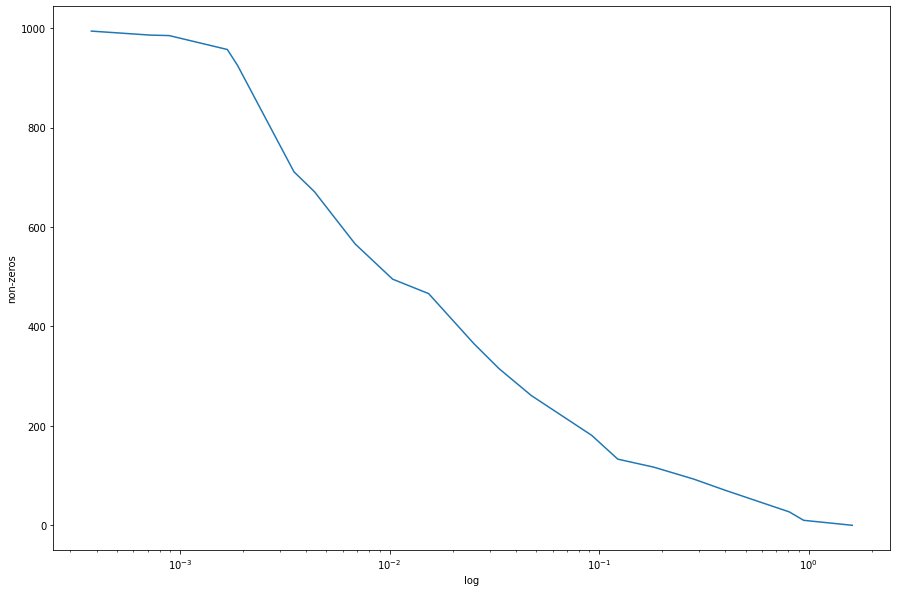

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.xscale('log')
plt.plot(lambda_list,nonzeros)
plt.ylabel("non-zeros")
plt.xlabel("log")

## Problem 3.2

In [ ]:
FDR = []
FDR_p = 0
TPR = []
TPR_p = 0
for i in range(len(betas)):
  for j in range(len(betas[0])):
    if betas[i][j] != 0 and w[j] == 0:
      FDR_p += 1
    elif betas[i][j] != 0 and w[j] != 0:
      TPR_p += 1
  FDR.append(FDR_p/np.linalg.norm(betas[i],0))
  print(np.linalg.norm(betas[i],0))
  FDR_p = 0
  TPR.append(TPR_p/k)
  print(TPR_p/k)
  TPR_p = 0

0.0
0.0
10.0
0.1
27.0
0.26
71.0
0.57
93.0
0.7
117.0
0.78
133.0
0.81
181.0
0.85
261.0
0.95
315.0
0.94
365.0
0.94
466.0
0.93
495.0
0.93
566.0
0.98
671.0
0.96
711.0
0.99
925.0
1.0
957.0
1.0
985.0
1.0
986.0
1.0
994.0
1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'TPR')

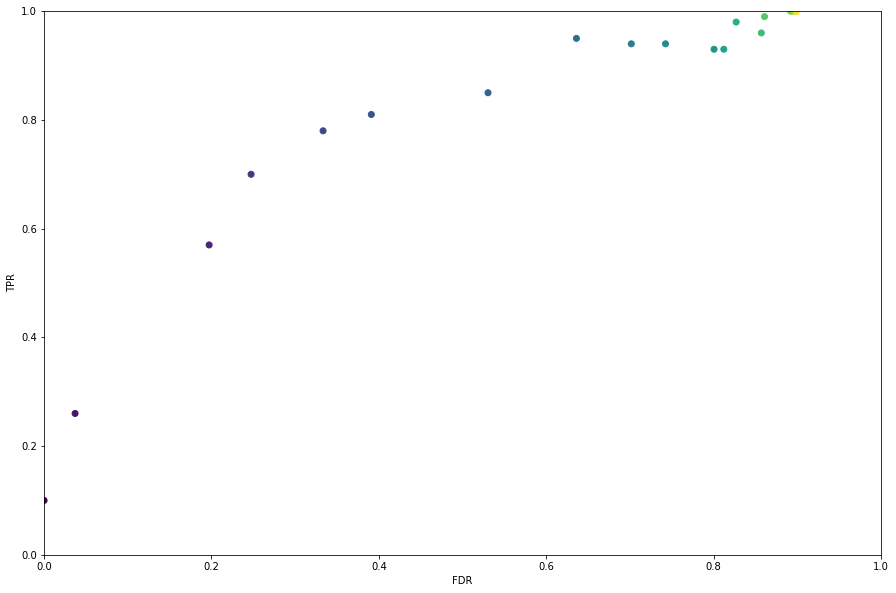

In [ ]:
color = np.linspace(0,len(FDR),len(TPR))
plt.figure(figsize=(15,10))
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(FDR, TPR,c=color)
plt.xlabel("FDR")
plt.ylabel("TPR")

### Problem 3.3

As lambda increases, the FDR increases but the TPR also increases. They both max out around 0.5ish. The lambda in this case changes how likely it is to have a true positive rate but also in turn increases the number of false discovery rate.

## Problem 4.1

--------------------------------------------------------------------------------

In [ ]:
import pandas as pd
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

In [ ]:
df_train

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.09,-0.38,-0.39,0.04,0.11,0.08,-0.69,-0.27,0.68,0.28,...,-0.23,0.02,-1.61,-1.08,-0.73,-1.32,-0.50,0.23,-0.49,-0.39
1591,0.45,-0.06,3.03,1.71,2.55,2.36,-1.58,-0.03,0.68,-0.39,...,-0.23,1.36,-1.76,-2.01,-2.63,-3.29,-0.41,0.68,0.17,-0.39
1592,0.23,0.81,-0.57,-0.48,0.04,-0.16,0.65,0.83,0.68,-0.24,...,-0.03,0.15,0.35,0.41,0.82,0.55,0.13,0.43,0.08,3.40
1593,0.19,0.18,0.28,1.00,1.71,1.76,-0.07,0.20,0.68,0.38,...,-0.13,1.01,0.15,0.03,-0.18,-0.66,-0.32,0.72,0.73,0.52


In [ ]:
df_train.columns.get_loc("agePct65up")

6

In [ ]:
crime_y = df_train["ViolentCrimesPerPop"].to_numpy()
crime_X = df_train.drop(columns=["ViolentCrimesPerPop"]).to_numpy()

In [ ]:
crime_X.T.shape

(95, 1595)

In [ ]:
def lmax(X,y):
    n, d =  X.shape
    lambda_max = 0
    for i in range(1,d+1):
        temp = max(2*abs((X[:,i-1].reshape(-1,1).T)@(y-(y.mean().reshape(-1,1)))))
        if temp > lambda_max:
            lambda_max = temp
    return lambda_max

In [ ]:
leave_while = False
penalty_exp = 0
nonzeros = []
lambda_list = []

l_max = lmax(crime_X, crime_y.reshape(-1,1))
penalty = l_max/(1.5)

betas = []
beta_init = np.zeros(95).reshape(95)
while not leave_while:
  lambda_list.append(penalty)
  penalty_exp+=1
  betaz = lasso_solver(crime_X,crime_y,beta_init,penalty,0.01)
  betas.append(betaz)
  num_non = np.linalg.norm(betaz,ord =0)
  nonzeros.append(num_non)
  if  penalty <= 0.01:
    leave_while = True

  penalty = penalty/2

Text(0.5, 0, 'log')

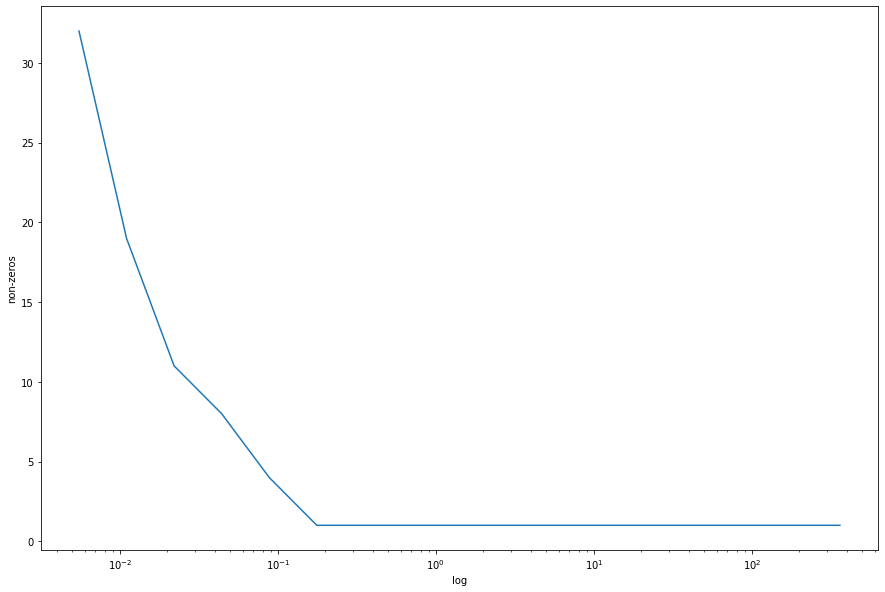

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.xscale('log')
plt.plot(lambda_list,nonzeros)
plt.ylabel("non-zeros")
plt.xlabel("log")

### Problem 4.2

agepct12t29 index 4 \\
pctWSocSec index 13 \\
pctUrban index 8 \\
agePct65up index 6

In [ ]:
crime_X_less = crime_X[4]
np.insert(0, crime_X_less,crime_X[6])

IndexError: ignored

In [ ]:
leave_while = False
penalty_exp = 0
nonzeros = []
lambda_list = []
l_max = lmax(crime_X, crime_y.reshape(-1,1))
penalty = l_max/(2)

betas = []
beta_init = np.zeros(95).reshape(95)
age = []
pct = []
urb = []
age65 = []
house = []
trainmse = []
testmse = []
while not leave_while:
  lambda_list.append(penalty)
  penalty_exp+=1
  betaz = lasso_solver(crime_X,crime_y,beta_init,penalty,0.01)
  betas.append(betaz)
  num_non = np.linalg.norm(betaz,0)
  nonzeros.append(num_non)
  age.append(float(betaz[4]))
  pct.append(float(betaz[13]))
  urb.append(float(betaz[8]))
  age65.append(float(betaz[6]))
  house.append(float(betaz[2]))

  if  penalty <= 0.01:
    leave_while = True

  penalty = penalty/2

In [ ]:
betas2 = np.array(betas)

In [ ]:
betas2[4]

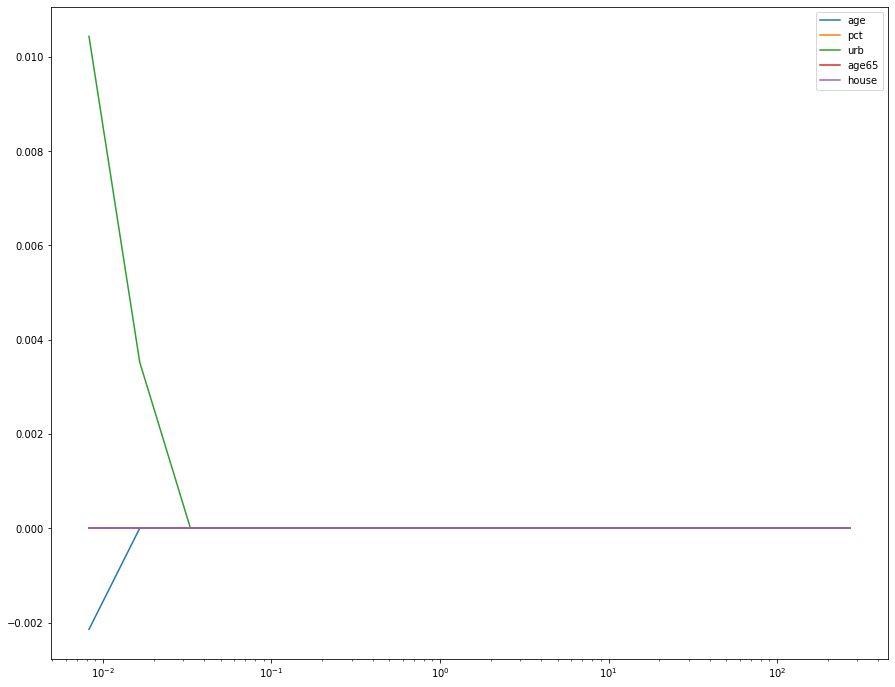

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(lambda_list,age,label = "age")
plt.plot(lambda_list,pct, label = "pct")
plt.plot(lambda_list,urb, label = "urb")
plt.plot(lambda_list,age65, label = "age65")
plt.plot(lambda_list, house, label = "house")
plt.legend()
plt.xscale('log')

In [ ]:
betas[3][6]

0.0013691106293629894

### Problem 4.3

In [ ]:
crime_y_test = df_test["ViolentCrimesPerPop"].to_numpy()
crime_X_test = df_test.drop(columns=["ViolentCrimesPerPop"]).to_numpy()

In [ ]:
leave_while = False
nonzeros_test = []
lambda_list_test = []
l_max_test = np.amax(crime_X_test.T @ crime_y_test)/len(crime_X_test)
penalty = l_max/(1.5)

betas_test = []
beta_init = np.zeros(95).reshape(95)

trainmse = []
testmse = []
while not leave_while:
  lambda_list_test.append(penalty)
  betaz_test = lasso_solver(crime_X_test,crime_y_test,beta_init,penalty,0.01)
  betaz = lasso_solver(crime_X,crime_y,beta_init,penalty,0.01)
  betas_test.append(betaz_test)
  num_non_test = np.linalg.norm(betaz,0)
  nonzeros_test.append(num_non_test)

  if  penalty <= 0.01:
    leave_while = True

  penalty = penalty/2

In [ ]:
betas_test2 = np.array(betas_test)

In [ ]:
lambda_list

[array([270.74130132]),
 array([135.37065066]),
 array([67.68532533]),
 array([33.84266266]),
 array([16.92133133]),
 array([8.46066567]),
 array([4.23033283]),
 array([2.11516642]),
 array([1.05758321]),
 array([0.5287916]),
 array([0.2643958]),
 array([0.1321979]),
 array([0.06609895]),
 array([0.03304948]),
 array([0.01652474]),
 array([0.00826237])]

In [ ]:
mse_train = np.sum(betas2**2,axis=1)/len(betas2)
mse_test = np.sum(betas_test2**2, axis=1)/len(betas_test)

Text(0, 0.5, 'Lambda')

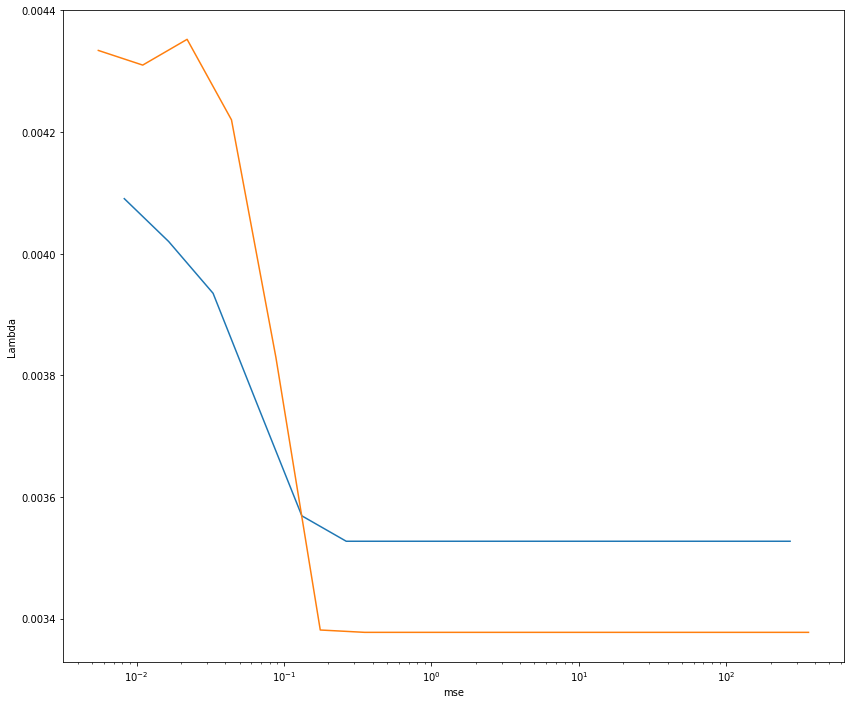

In [ ]:
plt.figure(figsize=(14,12))
plt.plot(lambda_list,mse_train)
plt.plot(lambda_list_test,mse_test)
plt.xscale('log')
plt.xlabel("log")
plt.xlabel("mse")
plt.ylabel("Lambda")

### Problem 4.4

In [ ]:
lambda_30 = lasso_solver(crime_X,crime_y,beta_init, 30, 0.1)

In [ ]:
# l_max = np.amax(crime_X.T @ crime_y)/len(crime_X)
l_max = lmax(crime_X, crime_y.reshape(-1,1))

In [ ]:
lambda_30

array([0.23542102, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

All the coefficients are 0 for 30 but for a value just around lambda max the coefficients are mostly all 0 still. This is because the lasso solver is overfitting and thinking every value is 0 or at the truth. More sensitivity, more true positive, more false positive.

### Problem 5

The 

### Problem 4.6


The coefficients are not direclty correlated and the variables may be independent. There are definitely many pitfalls for approaches like these, like from 4.5, the violent crime rates in high age neighborhoods can be low from a variety of causes like the fact that people who are older and neighborhoods which have a higher mean age will have less activity less violent activity at that. This is because the average age of the neighborhood is indepentant and not correlated directly to violent crime rates. They may be related to other factors like activity and not violent crime rates.

Predictive policing would only be possible if the data used is literally everything in the world, but in the real world, the data is limited so it is hard to predict thing in real like since many events in real life are correlated to many other events and are not direct correlations of specific events. Also re-allocating police resources to another location could increase violent crimes in a place where there was more police reasources before but not with less resources, the crime which was held at bay before is not more prominent and increase violent crimes there.

Also crime is committed by people and after the people realize that the police has reallocated their resources, the people which are committing the crime will most likely move to another place with less police resources. A game of cat and mouse.

In [ ]:
op = lasso_solver(crime_X, crime_y, beta_init, 0.1,0.01)

In [ ]:
np.count_nonzero(op)

In [ ]:
from sklearn import linear_model
clf2=linear_model.Lasso(alpha=1,tol=0.001)
clf2.fit(crime_X,crime_y)

In [ ]:
np.count_nonzero(clf2.coef_)

In [ ]:
from sklearn.linear_model import LinearRegression

reg2= LinearRegression(copy_X=True).fit(crime_X,crime_y)
np.count_nonzero(reg2.coef_)

In [ ]:
np.count_nonzero(four.coef_)

In [ ]:
from sklearn import linear_model
clf3 = linear_model.Lasso(alpha=0.1)
clf3.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf3.coef_)

In [ ]:
h = np.array([[0,0], [1, 1], [2, 2]])
h
b = np.zeros(2)
u = np.array([0, 1, 2])
h

In [ ]:
lasso_solver(h, u,b,0.1,1)